#Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Load the Dataset

In [2]:
# Load the pre prepared data from TensofFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Preprocessing

In [3]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# Define a Callback to Avoid Overfitting

In [4]:
class Callback(tf.keras.callbacks.Callback):
  def __init__(self, threshold):
        super(Callback, self).__init__()
        self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None):
      if logs is not None and logs.get("val_accuracy") > self.threshold:
          print(f"\nReached {self.threshold * 100}% validation accuracy so cancelling training!")
          self.model.stop_training = True

# Create a Model

In [28]:
# Define a model with functional API
def build_model():
  input_layer = tf.keras.Input(shape=(28, 28, 1))

  x = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1))(input_layer)
  x = tf.keras.layers.MaxPooling2D(2, 2)(x)

  x = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
  x = tf.keras.layers.MaxPooling2D(2, 2)(x)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(128, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  output_layer = tf.keras.layers.Dense(10, activation="softmax")(x)

  model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
  return model

model = build_model()

# Model Summary

In [31]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0   

# Train the Model

In [30]:
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.15,
)

datagen.fit(x_train)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

epochs = 20
callbacks = Callback(0.9950)

history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
          steps_per_epoch=len(x_train) / 128,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callbacks])

Epoch 1/20
468/468 [==============================] - 24s 47ms/step - loss: 0.3678 - accuracy: 0.8798 - val_loss: 0.0503 - val_accuracy: 0.9835
Epoch 2/20
468/468 [==============================] - 22s 46ms/step - loss: 0.1132 - accuracy: 0.9645 - val_loss: 0.0342 - val_accuracy: 0.9885
Epoch 3/20
468/468 [==============================] - 21s 45ms/step - loss: 0.0865 - accuracy: 0.9732 - val_loss: 0.0391 - val_accuracy: 0.9862
Epoch 4/20
468/468 [==============================] - 20s 44ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0298 - val_accuracy: 0.9887
Epoch 5/20
468/468 [==============================] - 21s 46ms/step - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 6/20
468/468 [==============================] - 21s 44ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0271 - val_accuracy: 0.9906
Epoch 7/20
468/468 [==============================] - 21s 46ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0191 - val_accuracy:

# Show Training Chart

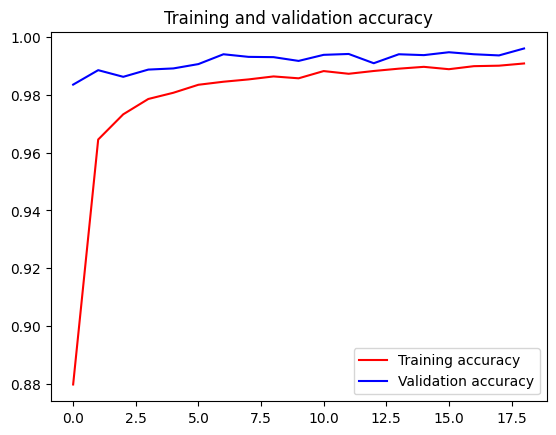

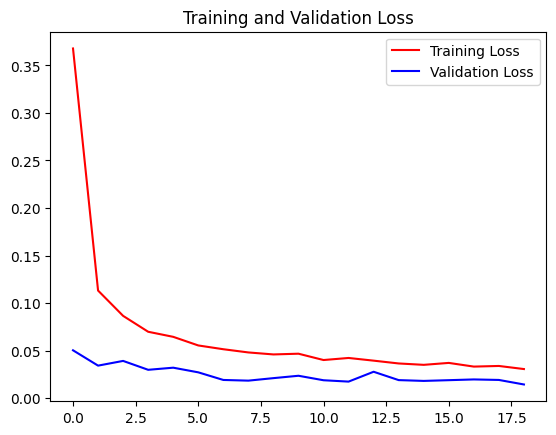

In [32]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.show()
print()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc=0)
plt.show()

# Evaluate the Model

In [33]:
loss, acc = model.evaluate(x=x_test, y=y_test)
print("Loss:", loss)
print("Accuracy:", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9960
Loss: 0.014352827332913876
Accuracy: 0.9959999918937683


# Save the Model and Model Weights


In [34]:
model.save("/content/model/model2.h5")
model.save_weights("/content/model/model2_weights.h5")